In this workbook, I have built and tested several clustering algorithm with the goal on creating customer segmentation

The dataset used has the credit card details of the customer along with some of the demographic details

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

In [ ]:
# Import the dataset 
df1 = pd.read_csv("Dataset.csv")
df1.head(4)
df1.shape

,Client ID Number,Campaign Response,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Did Not Respond,45,M,High School,Married,$60K - $80K,Rewards Basic,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Did Not Respond,49,F,Graduate,Single,Less than $40K,Rewards Basic,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Did Not Respond,51,M,Graduate,Married,$80K - $120K,Rewards Basic,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Did Not Respond,40,F,High School,Unknown,Less than $40K,Rewards Basic,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


(10127, 20)

## **Data Processing**

In [ ]:
df1.isnull().sum()

Client ID Number               0
Campaign Response              0
Customer_Age                   0
Gender                         0
Education_Level             1487
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
df1.loc[df1.Education_Level.isnull(), :].head(5)

,Client ID Number,Campaign Response,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4,709106358,Did Not Respond,40,M,NaN,Married,$60K - $80K,Rewards Basic,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
8,710930508,Did Not Respond,37,M,NaN,Single,$60K - $80K,Rewards Basic,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
10,708790833,Did Not Respond,42,M,NaN,Unknown,$120K +,Rewards Basic,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
28,718813833,Did Not Respond,44,F,NaN,Single,Unknown,Rewards Basic,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
31,712991808,Did Not Respond,53,M,NaN,Married,$60K - $80K,Rewards Basic,48,2,5,1,2451.0,1690,761.0,1.323,1596,26,1.600,0.690


In [ ]:
df1.fillna(value='Null', axis=0, inplace=True)

In [ ]:
subset = ['Customer_Age','Gender','Education_Level','Marital_Status',
          'Income_Category','Card_Category','Months_on_book','Total_Relationship_Count',
          'Months_Inactive_12_mon','Contacts_Count_12_mon',
          'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
          'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
          'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [ ]:
df = df1.loc[:,subset]

In [ ]:
# Categorical and numerical features
cat_cols = list(df.select_dtypes("object").columns)
num_cols = list(df.select_dtypes(exclude="object").columns)

In [ ]:
### Preprocessing the numerical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
ohe = OneHotEncoder()

Column_trans = ColumnTransformer(
     [('scale', scaler, num_cols),
      ('Onehot', ohe, cat_cols),
      ],
     remainder='passthrough')
preprocessor = Pipeline(
    [('features', Column_trans), 
     ("pca", PCA(n_components=2, random_state=42))
     ])
X = preprocessor.fit_transform(df)

## **Model Building**

**Kmeans**

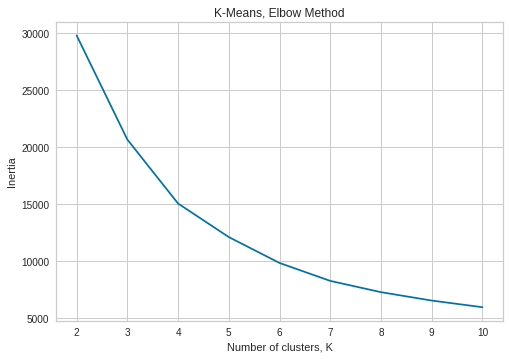

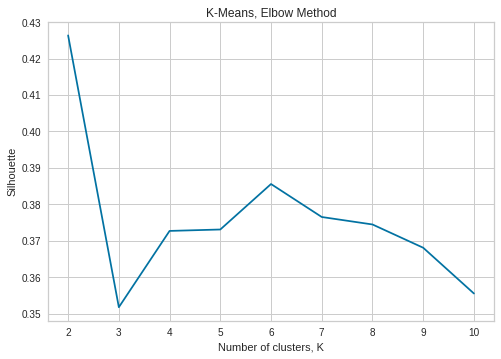

In [ ]:
################## Tuning the hyperparameter 'k' based on chs and Silhoutte score############################
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1dd34c310>,
                     model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1dca0f210>,
                     model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1dc77f850>,
                     model=None)

'\n    Create KMeans instance for different number of clusters\n    '

'\n    Create SilhouetteVisualizer instance with KMeans instance\n    Fit the visualizer\n    '

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1dceade90>,
                     model=None)

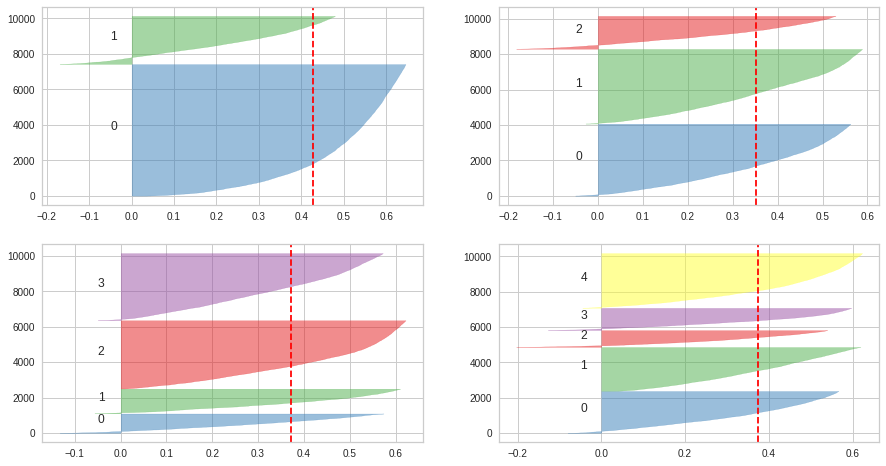

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2, 6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=1)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**Hierarchical Clustering**

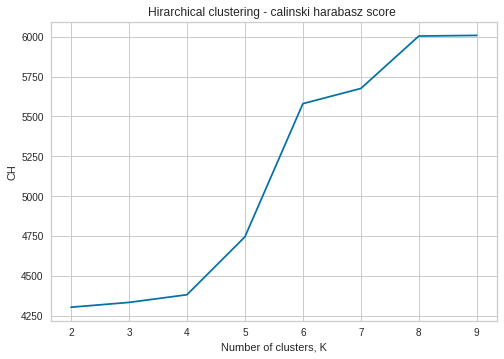

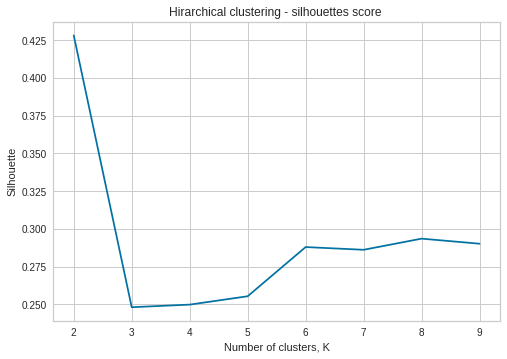

In [ ]:
################## Tuning the hyperparameter 'k' based on chs and Silhoutte score############################
chs = {}
silhouettes = {}
        
for k in range(2, 10):
    aggo = AgglomerativeClustering(n_clusters=k, affinity='euclidean')
    aggo.fit(X)
    sil = silhouette_score(X, aggo.labels_,  metric='euclidean')
    ch = calinski_harabasz_score(X, aggo.labels_)
    chs[k] = ch
    silhouettes[k] = sil    
    
plt.figure();
plt.plot(list(chs.keys()), list(chs.values()));
plt.xlabel("Number of clusters, K");
plt.ylabel("CH");
plt.title("Hirarchical clustering - calinski harabasz score ")
plt.show();

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.title("Hirarchical clustering - silhouettes score ")
plt.show();

**GMM**

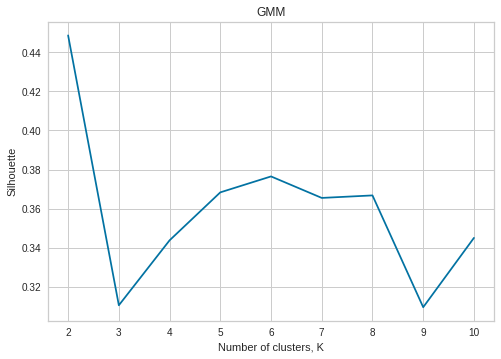

In [ ]:
silhouettes = {}
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, covariance_type='full').fit(X)
    labels = gmm.predict(X)
    silhouettes[k] = silhouette_score(X, labels, metric='euclidean')
    
plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('GMM')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

**3) DBSCAN**

<Figure size 576x396 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN, Elbow Method')

Text(0.5, 0, 'Eps')

Text(0, 0.5, 'Silhouette')

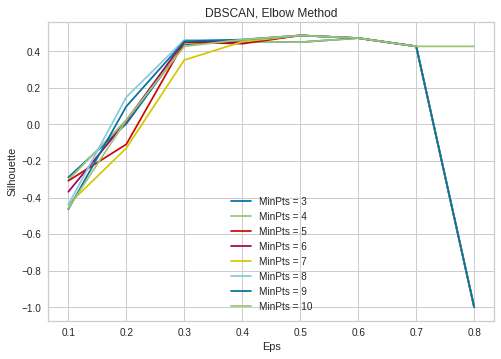

In [ ]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))
cl = np.zeros((len(epss), len(minss)))
for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label=f"MinPts = {minss[i]}")
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend()
#plt.savefig('out/simple_dbscan_elbow');

In [ ]:
db = DBSCAN(eps=0.8, min_samples=8).fit(X)

## **PCA**  
- Visualize the cluster in 2-D plot

**Kmeans (n_Cluster=3)**

<Figure size 360x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clustering results')

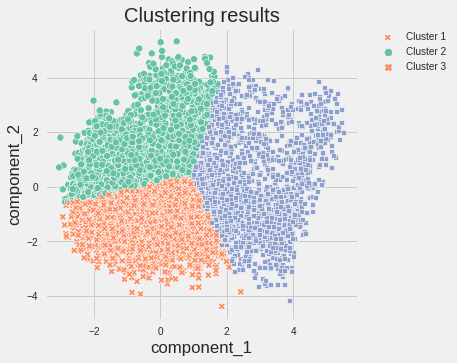

In [ ]:
pcadf = pd.DataFrame(
    preprocessor.transform(df),
    columns=["component_1", "component_2"],
)
## Selecting 3
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
pcadf["predicted_cluster"] = kmeans.labels_
#pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(5, 5))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="predicted_cluster",
    palette="Set2",
)

scat.set_title(
    "Clustering results"
)
plt.legend(["Cluster 1","Cluster 2","Cluster 3"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()